# Lendo nomes com Json

## Criando os nomes

In [200]:
import pandas as pd

In [201]:
nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f")
nomes_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m")

In [202]:
nomes_f.sample(10)

,nome,regiao,freq,rank,sexo
25,BEATRIZ,0,354980,26,F
178,ELIZANGELA,0,88505,179,F
17,LUCIANA,0,429769,18,F
82,SOLANGE,0,199583,83,F
77,MARINA,0,207760,78,F
93,ELIANA,0,181533,94,F
157,CONCEICAO,0,102585,158,F
118,VANIA,0,137073,119,F
103,KATIA,0,163299,104,F
140,NEUZA,0,114541,141,F


In [203]:
nomes_m.sample(10)

,nome,regiao,freq,rank,sexo
30,ANDERSON,0,470777,31,M
45,ADRIANO,0,335585,46,M
196,ARLINDO,0,66669,197,M
158,EDIVALDO,0,81446,159,M
1,JOAO,0,2971935,2,M
83,RENAN,0,170182,84,M
168,CRISTIAN,0,77504,169,M
131,BRENO,0,111653,132,M
149,ISRAEL,0,93685,150,M
49,ALEX,0,309181,50,M


In [204]:
print(f'Quantidade de nomes: {len(nomes_f)} femininos e {len(nomes_m)} masculinos para um total de {len(nomes_f) + len(nomes_m)} alunos.')

Quantidade de nomes: 200 femininos e 200 masculinos para um total de 400 alunos.


In [205]:
frames = [nomes_f, nomes_m]

In [206]:
nomes = pd.concat(frames)['nome'].to_frame()
nomes.sample(5)

,nome
115,TALITA
122,CINTIA
184,ALISON
139,MARGARIDA
69,TEREZA


In [207]:
nomes.shape

(400, 1)

## Incluindo ID dos alunos

In [208]:
import numpy as np
np.random.seed(123)

In [209]:
total_alunos = len(nomes)
total_alunos

400

In [210]:
nomes['id_aluno'] = np.random.permutation(total_alunos) + 1  # Randomly permute a sequence, or return a permuted range.

In [211]:
nomes.sample(5)

,nome,id_aluno
188,POLIANA,369
57,DAIANE,303
3,FRANCISCO,382
182,CHARLES,33
30,ANDERSON,111


In [212]:
dominios = ['@dominiodoemail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)  # Generates a random sample from a given 1-D array
nomes.sample(5)

,nome,id_aluno,dominio
84,SEVERINO,78,@dominiodoemail.com.br
0,JOSE,331,@servicodoemail.com
179,IAGO,340,@dominiodoemail.com.br
10,SANDRA,174,@dominiodoemail.com.br
171,TERESINHA,45,@dominiodoemail.com.br


In [213]:
nomes['email'] = nomes['nome'].str.cat(nomes.dominio).str.lower()  # pandas.Series.str.cat => Concatenate strings in the Series/Index with given separator.

In [214]:
nomes.sample(5)

,nome,id_aluno,dominio,email
114,ARTHUR,320,@dominiodoemail.com.br,arthur@dominiodoemail.com.br
57,DAIANE,303,@servicodoemail.com,daiane@servicodoemail.com
85,HELENA,221,@dominiodoemail.com.br,helena@dominiodoemail.com.br
183,IRACI,8,@dominiodoemail.com.br,iraci@dominiodoemail.com.br
189,DALVA,137,@dominiodoemail.com.br,dalva@dominiodoemail.com.br


## Criando cursos

In [215]:
import html5lib
import lxml

In [216]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)

In [217]:
type(cursos)

list

In [218]:
cursos = cursos[0]  # cria dataframe

In [219]:
type(cursos)

pandas.core.frame.DataFrame

In [220]:
cursos.head(5)

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


## Alterando o index

In [221]:
cursos = cursos.rename(columns={'Nome do curso' : 'nome_do_curso'})

In [222]:
cursos.head(3)

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web


In [223]:
cursos['id'] = cursos.index + 1

In [224]:
cursos.head(3)

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3


In [225]:
cursos = cursos.set_index('id')

In [226]:
cursos.head(10)

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python
6,PHP com MySql
7,.NET para web
8,Novas integrações com Java
9,TDD com Java


## Matriculando alunas e alunos

In [227]:
# random.exponential => Draw samples from an exponential distribution.
# numpy.ceil => Return the ceiling of the input, element-wise.

nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos) * 1.5).astype(int)
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
105,MILENA,371,@dominiodoemail.com.br,milena@dominiodoemail.com.br,2
183,IRACI,8,@dominiodoemail.com.br,iraci@dominiodoemail.com.br,1
10,LUIS,125,@dominiodoemail.com.br,luis@dominiodoemail.com.br,2
139,OSMAR,71,@dominiodoemail.com.br,osmar@dominiodoemail.com.br,2
40,SERGIO,139,@servicodoemail.com,sergio@servicodoemail.com,2


In [228]:
nomes.matriculas.describe()

count    400.000000
mean       2.135000
std        1.515757
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       12.000000
Name: matriculas, dtype: float64

In [229]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


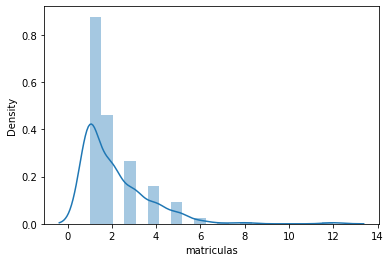

In [230]:
sns.distplot(nomes.matriculas)

In [231]:
nomes.matriculas.value_counts()

1     184
2      97
3      56
4      34
5      19
6       5
12      2
8       2
7       1
Name: matriculas, dtype: int64

## Selecionando os cursos

In [232]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
103,MAICON,295,@servicodoemail.com,maicon@servicodoemail.com,4
44,RAIMUNDA,259,@servicodoemail.com,raimunda@servicodoemail.com,5
50,RAFAELA,27,@dominiodoemail.com.br,rafaela@dominiodoemail.com.br,3
171,TERESINHA,45,@dominiodoemail.com.br,teresinha@dominiodoemail.com.br,1
41,CLAUDIO,204,@servicodoemail.com,claudio@servicodoemail.com,1


In [233]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [234]:
# Pandas DataFrame.iterrows() is used to iterate over a pandas Data frame 
# rows in the form of (index, series) pair. 
# This function iterates over the data frame column, 
# it will return a tuple with the column name and content in form of series.   

for index, row in nomes.iterrows():
  id = row.id_aluno
  matriculas = row.matriculas
  for i in range(matriculas):
    mat = [id, np.random.choice(cursos.index, p=prob)]
    todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])

In [235]:
matriculas.head()

,id_aluno,id_curso
0,235,19
1,43,6
2,304,16
3,304,18
4,304,11


In [236]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

In [237]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
9,ALINE,92,@dominiodoemail.com.br,aline@dominiodoemail.com.br,1
14,MARCELO,138,@dominiodoemail.com.br,marcelo@dominiodoemail.com.br,4
141,ORLANDO,159,@servicodoemail.com,orlando@servicodoemail.com,8


In [238]:
cursos.sample(3)

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
18,Programação funcional


In [239]:
matriculas.sample(3)

,id_aluno,id_curso
663,263,20
200,96,8
315,301,4


In [240]:
matriculas_por_curso.sample(3)

,quantidade_de_alunos,nome_do_curso
id_curso,,
20,42,Orientação objetos com Java
9,41,TDD com Java
12,87,Hardware básico


## Saída em diferentes formatos

In [241]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index=False)

In [242]:
pd.read_csv('matriculas_por_curso.csv')

,quantidade_de_alunos,nome_do_curso
0,77,Lógica de programação
1,4,Java para Web
2,32,C# para Web
3,68,Ruby on Rails
4,17,Cursos de Python
5,36,PHP com MySql
6,38,.NET para web
7,16,Novas integrações com Java
8,41,TDD com Java
9,67,Código limpo com C#


In [243]:
# exportando JSON
matriculas_json = matriculas_por_curso.to_json()

In [244]:
matriculas_json

'{"quantidade_de_alunos":{"1":77,"2":4,"3":32,"4":68,"5":17,"6":36,"7":38,"8":16,"9":41,"10":67,"11":56,"12":87,"13":17,"15":23,"16":74,"17":13,"18":65,"19":81,"20":42},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [245]:
# exportando HTML
matriculas_html = matriculas_por_curso.to_html()

In [246]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>77</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>4</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>32</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>68</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>17</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>36</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>38</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>16</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>41</td>
 

# Criando o banco SQL

 Nota: Warning SADeprecation 





Atualização no método usado na aula.

Método antigo:

```
from sqlalchemy import create_engine, MetaData, Table

engine = create_engine('sqlite:///:memory:')
engine
type(engine)

matriculas_por_curso.to_sql('matriculas', engine)

print(engine.table_names())
```



Método novo:



```
from sqlalchemy import create_engine, MetaData, Table, inspect # adicionando o método inspect

engine = create_engine('sqlite:///:memory:')
engine
type(engine)

matriculas_por_curso.to_sql('matriculas', engine)

inspector = inspect(engine) # criando um Inspector object
print(inspector.get_table_names()) # Exibindo as tabelas com o inspecto
```



In [247]:
from sqlalchemy import create_engine, MetaData, Table, inspect

Caso o nosso banco fosse do tipo MySQL ou Postgres, teríamos que instalar outra biblioteca para lê-lo. Como estamos usando o SQLite, que vem nativamente no Colab, não há essa necessidade.

In [248]:
engine = create_engine('sqlite:///:memory:')  # memoria local

In [249]:
type(engine)

sqlalchemy.engine.base.Engine

In [250]:
matriculas_por_curso.to_sql('matriculas', engine)

In [251]:
print(engine.table_names())  # retorna o erro da descontinuação

['matriculas']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


In [252]:
# novo metodo inspect()

inspector = inspect(engine)

In [253]:
# metodo get do objeto inspect()

print(inspector.get_table_names())

['matriculas']


## Buscando no banco SQL

In [254]:
# exemplo de query
query = 'select * from matriculas where quantidade_de_alunos < 20'

In [255]:
# fazendo a query
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,2,4,Java para Web
1,5,17,Cursos de Python
2,8,16,Novas integrações com Java
3,13,17,Persistência com .NET
4,17,13,Internet das coisas


In [256]:
# lendo tabela
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

In [257]:
muitas_matriculas.head()

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,77
1,Java para Web,4
2,C# para Web,32
3,Ruby on Rails,68
4,Cursos de Python,17


In [258]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos > 70')  # query do pandas

In [259]:
muitas_matriculas.head()

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,77
11,Hardware básico,87
14,Estatística básica,74
17,Boas práticas em Java,81


## Escrevendo no banco SQL

In [260]:
muitas_matriculas.to_sql('muitas_matriculas', con=engine)

In [261]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


In [262]:
# não retorna 'muitas_matriculas' pois precisa mandar o inspector inspecionar a engine novamente
print(inspector.get_table_names())

['matriculas']


In [263]:
inspector = inspect(engine)  # inspector dá uma olhada na engine

In [264]:
print(inspector.get_table_names())  # e aí entao retorna com as tabelas corretamente

['matriculas', 'muitas_matriculas']


## Nomes da próxima turma

In [265]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,77,Lógica de programação
2,4,Java para Web
3,32,C# para Web
4,68,Ruby on Rails
5,17,Cursos de Python


In [266]:
matriculas

,id_aluno,id_curso
0,235,19
1,43,6
2,304,16
3,304,18
4,304,11
...,...,...
849,323,7
850,323,11
851,383,11
852,366,1


In [269]:
id_curso = 5  # curso de python
proxima_turma = matriculas.query(f'id_curso == {id_curso}')
proxima_turma

,id_aluno,id_curso
129,233,5
184,329,5
194,126,5
223,148,5
232,149,5
268,285,5
349,247,5
367,82,5
409,229,5
425,38,5


In [270]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
30,ELIANE,172,@servicodoemail.com,eliane@servicodoemail.com,3
24,FABIO,400,@servicodoemail.com,fabio@servicodoemail.com,3
131,ANGELICA,370,@dominiodoemail.com.br,angelica@dominiodoemail.com.br,2


In [272]:
# join entre duas tabelas no id_aluno
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
233,5,ELAINE,@servicodoemail.com,elaine@servicodoemail.com,4
329,5,MONICA,@dominiodoemail.com.br,monica@dominiodoemail.com.br,1
126,5,FATIMA,@servicodoemail.com,fatima@servicodoemail.com,2
148,5,THAIS,@servicodoemail.com,thais@servicodoemail.com,5
149,5,MARILENE,@dominiodoemail.com.br,marilene@dominiodoemail.com.br,1
285,5,VANIA,@dominiodoemail.com.br,vania@dominiodoemail.com.br,12
247,5,RAIANE,@servicodoemail.com,raiane@servicodoemail.com,1
82,5,IARA,@servicodoemail.com,iara@servicodoemail.com,6
229,5,NAIARA,@dominiodoemail.com.br,naiara@dominiodoemail.com.br,3


In [274]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
233       ELAINE
329       MONICA
126       FATIMA
148        THAIS
149     MARILENE
285        VANIA
247       RAIANE
82          IARA
229       NAIARA
38       ISADORA
70      RAIMUNDO
152    SEBASTIAO
131         DAVI
141        PABLO
263         IVAN
312    WANDERSON
74        MARLON
Name: nome, dtype: object

In [275]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

,nome
id_aluno,
233,ELAINE
329,MONICA
126,FATIMA
148,THAIS
149,MARILENE
285,VANIA
247,RAIANE
82,IARA
229,NAIARA


In [277]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Cursos de Python
Name: 5, dtype: object

In [278]:
nome_curso = nome_curso.nome_do_curso
nome_curso

'Cursos de Python'

In [280]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

In [283]:
proxima_turma = proxima_turma.rename(columns={'nome' : f'Alunos do curso de {nome_curso}'})

In [284]:
proxima_turma.sample(5)

,Alunos do curso de Cursos de Python
id_aluno,
126,FATIMA
82,IARA
329,MONICA
263,IVAN
233,ELAINE


# Escrevendo e lendo excel

In [285]:
proxima_turma.to_excel('proxima_turma.xlsx', index=False)

In [286]:
pd.read_excel('proxima_turma.xlsx')

,Alunos do curso de Cursos de Python
0,ELAINE
1,MONICA
2,FATIMA
3,THAIS
4,MARILENE
5,VANIA
6,RAIANE
7,IARA
8,NAIARA
9,ISADORA
